In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [442]:
import numpy as np a
import pandas as pd
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
import os
print(os.listdir('/content/drive/My Drive/ck/CK+48'))


# Any results you write to the current directory are saved as output

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.datasets import make_classification
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

['sadness', 'fear', 'contempt', 'disgust', 'surprise', 'anger', 'happy']


In [560]:
data_path = '/content/drive/My Drive/ck/CK+48'
data_dir_list = os.listdir(data_path)



img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255 #remove this to view the data in the next cell for cross-verfication of label and data
img_data.shape

Loaded the images of dataset-sadness

Loaded the images of dataset-fear

Loaded the images of dataset-contempt

Loaded the images of dataset-disgust

Loaded the images of dataset-surprise

Loaded the images of dataset-anger

Loaded the images of dataset-happy



(990, 48, 48, 3)

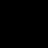

0


In [719]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

#change the labels accordingly
labels[0:84]=0 #84 sad
labels[85:159]=1 #54 fear
labels[159:213]=2 #177 con
labels[214:399]=3 #75 dis 
labels[399:648]=4 #207 sup
labels[648:783]=5 #84 ang
labels[783:980]=6 #249 hap
cv2_imshow(img_data[83])
print(labels[83]) #remove img_data = img_data/255 to view the data

In [562]:
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
X_train = X_train.reshape(X_train.shape[0], 48, 48, 3)  

X_test = X_test.reshape(X_test.shape[0], 48, 48, 3)  



In [564]:
def create_model():
    model = Sequential()
    model.add(Conv2D(3, kernel_size=(3, 3), input_shape=(48,48,3))) 
    model.add(LeakyReLU(alpha=0.1)) 
    model.add(BatchNormalization())
    model.add(Conv2D(6,kernel_size= (5, 5)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  
    model.add(BatchNormalization()) 
    model.add(Dropout(0.2)) 
#2nd convolution layer  
    model.add(Conv2D(9, (3, 3)))  
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Conv2D(12, (3, 3)))  
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
    model.add(BatchNormalization())  
    model.add(Dropout(0.2))  
    model.add(Flatten()) 

#fully connected neural networks  
    model.add(Dense(10))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))  
    model.add(Dense(7, activation='softmax'))  
    Nadam=tf.keras.optimizers.Nadam(learning_rate=0.0004, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")
    model.compile(loss='categorical_crossentropy',  
              optimizer=Nadam,
              metrics=['accuracy'])  

    
    return model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
model_custom = create_model()
model_custom.summary()
def generator(X_data, y_data, batch_size):

  samples_per_epoch = X_data.shape[0]
  number_of_batches = samples_per_epoch/batch_size
  counter=0

  while 1:

    X_batch = np.array(X_data[batch_size*counter:batch_size*(counter+1)]).astype('float32')
    y_batch = np.array(y_data[batch_size*counter:batch_size*(counter+1)]).astype('float32')
    counter += 1
    yield X_batch,y_batch

    #restart counter to yeild data in the next epoch as well
    if counter >= number_of_batches:
        counter = 0

In [634]:
gg=model_custom.fit_generator(generator(X_train, y_train, batch_size = 12), steps_per_epoch = 20, epochs=125, validation_data=(X_test, y_test), shuffle=1)
# visualizing losses and accuracy
%matplotlib inline

train_loss=gg.history['loss']
val_loss=gg.history['val_loss']
train_acc=gg.history['accuracy']
val_acc=gg.history['val_accuracy']

Epoch 1/125
20/20 [==============================] - 0s 12ms/step - loss: 0.3581 - accuracy: 0.8875 - val_loss: 0.1295 - val_accuracy: 0.9848
Epoch 2/125
20/20 [==============================] - 0s 9ms/step - loss: 0.4147 - accuracy: 0.8250 - val_loss: 0.1302 - val_accuracy: 0.9848
Epoch 3/125
20/20 [==============================] - 0s 9ms/step - loss: 0.4349 - accuracy: 0.8333 - val_loss: 0.1343 - val_accuracy: 0.9848
Epoch 4/125
20/20 [==============================] - 0s 9ms/step - loss: 0.4070 - accuracy: 0.8583 - val_loss: 0.1229 - val_accuracy: 0.9798
Epoch 5/125
20/20 [==============================] - 0s 10ms/step - loss: 0.3800 - accuracy: 0.8625 - val_loss: 0.1158 - val_accuracy: 0.9848
Epoch 6/125
20/20 [==============================] - 0s 10ms/step - loss: 0.3609 - accuracy: 0.8667 - val_loss: 0.1235 - val_accuracy: 0.9798
Epoch 7/125
20/20 [==============================] - 0s 10ms/step - loss: 0.3732 - accuracy: 0.8917 - val_loss: 0.1226 - val_accuracy: 0.9747
Epoch 8/1

<Figure size 432x288 with 0 Axes>

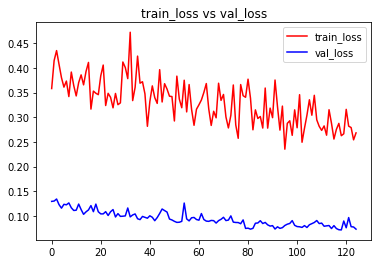

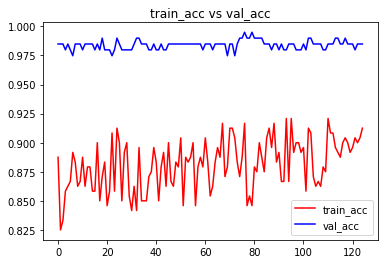

<Figure size 432x288 with 0 Axes>

In [659]:

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [660]:

target_dir = '/content/drive/My Drive/model/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
model_custom.save('/content/drive/My Drive/model/model.h5')
model_custom.save_weights('/content/drive/My Drive/model/weights.h5')

In [661]:
#importing model
##code to access web cam via colab #####
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [708]:

image_file = take_photo()

<IPython.core.display.Javascript object>

400 300


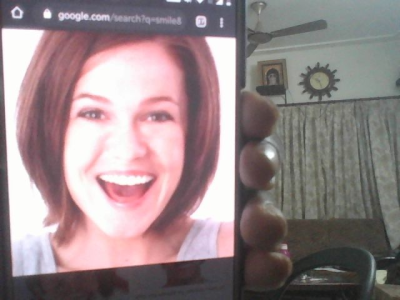

In [709]:

import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
image = cv2.imread(image_file)

# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
img = image
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

In [710]:
#getting pre-trained face detector to get the region of interest(face)
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

--2020-10-12 16:55:44--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.008s  

Last-modified header missing -- time-stamps turned off.
2020-10-12 16:55:44 (3.50 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2020-10-12 16:55:44--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubuserconten

In [711]:
print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

[INFO] loading model...


In [712]:
# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

In [713]:
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


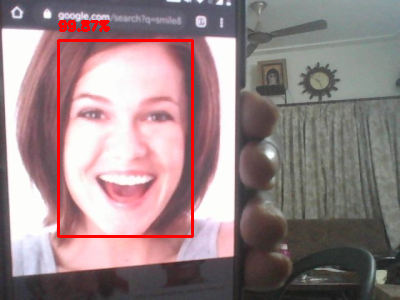

In [714]:
for i in range(0, detections.shape[2]):

	# extract the confidence (i.e., probability) associated with the prediction
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence threshold
	if confidence > 0.5:
		# compute the (x, y)-coordinates of the bounding box for the object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		# draw the bounding box of the face along with the associated probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
cv2_imshow(image)
#extracting the region of interest
h=box[3]-box[1]
w=box[2]-box[0]
x=box[0]
y=box[1]
y1=y+h
x1=x+w
roi = image[int(y):int(y1), int(x):int(x1)]
roi=cv2.resize(roi,(48,48))
from keras.preprocessing import image
import tensorflow as tf
image_pixels=tf.keras.preprocessing.image.img_to_array(roi)
image_pixels = np.expand_dims(image_pixels, axis = 0)
#image_pixels /= 255

model = tf.keras.models.load_model('/content/drive/My Drive/model/model.h5')
predictions = model.predict(image_pixels)
max_index = np.argmax(predictions[0])
emotion_detection = ('sad','fear','contempt','disgust','surprise','anger','happy')
emotion_prediction = emotion_detection[max_index]


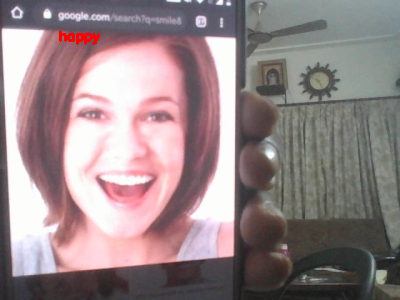

In [715]:
cv2.putText(img,emotion_prediction, (int(startX), int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
cv2_imshow(img)

In [716]:
print(emotion_prediction) 

happy


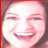

In [717]:
#region of interest
cv2_imshow(roi)

In [718]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

<IPython.core.display.Javascript object>

400 300


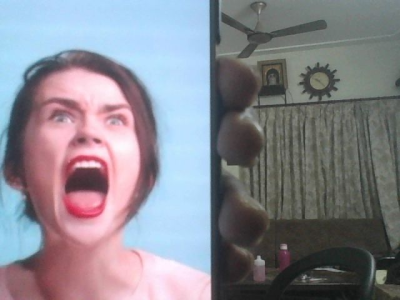

In [673]:

image_file = take_photo()
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
image = cv2.imread(image_file)

# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
img = image
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

[INFO] computing object detections...


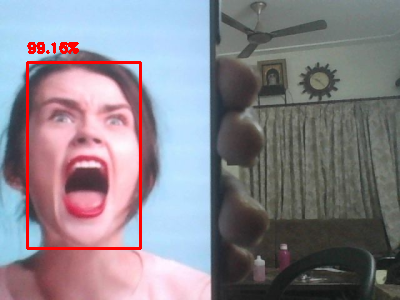

(48, 48, 3)


In [674]:
# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()
for i in range(0, detections.shape[2]):

	# extract the confidence (i.e., probability) associated with the prediction
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence threshold
	if confidence > 0.5:
		# compute the (x, y)-coordinates of the bounding box for the object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		# draw the bounding box of the face along with the associated probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
cv2_imshow(image)
#extracting the region of interest
h=box[3]-box[1]
w=box[2]-box[0]
x=box[0]
y=box[1]
y1=y+h
x1=x+w
roi = image[int(y):int(y1), int(x):int(x1)]
roi=cv2.resize(roi,(48,48))
from keras.preprocessing import image
import tensorflow as tf
roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/content/drive/My Drive/gray.jpg', roi)
roi = cv2.imread('/content/drive/My Drive/gray.jpg')
print(roi.shape)
image_pixels=tf.keras.preprocessing.image.img_to_array(roi)
image_pixels = np.expand_dims(image_pixels, axis = 0)
image_pixels /= 255
predictions = model.predict(image_pixels)
max_index = np.argmax(predictions[0])
emotion_detection = ('sad','fear','contempt','disgust','surprise','anger','happy')
emotion_prediction = emotion_detection[max_index]


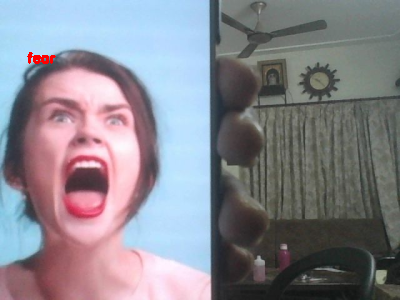

In [675]:
cv2.putText(img,emotion_prediction, (int(startX), int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
cv2_imshow(img)

In [676]:
predictions[0]

array([0.03916322, 0.57613313, 0.02376825, 0.24596106, 0.03124399,
       0.01456756, 0.06916276], dtype=float32)

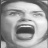

In [677]:
  #region of interest
cv2_imshow(roi)